In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-dataset/zomato.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

df = pd.read_csv("/kaggle/input/zomato-dataset/zomato.csv", encoding="latin1")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.shape
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes'],
      dtype='object')

In [5]:
df.isnull().sum().sort_values(ascending=False)

cuisines                9
restaurant_id           0
currency                0
rating_text             0
rating_color            0
aggregate_rating        0
price_range             0
switch_to_order_menu    0
is_delivering_now       0
has_online_delivery     0
has_table_booking       0
average_cost_for_two    0
restaurant_name         0
latitude                0
longitude               0
locality_verbose        0
locality                0
address                 0
city                    0
country_code            0
votes                   0
dtype: int64

In [6]:
df = df.dropna(subset=['cuisines'])

In [7]:
df.duplicated(subset=['restaurant_id']).sum()

0

In [8]:
df.dtypes

restaurant_id             int64
restaurant_name          object
country_code              int64
city                     object
address                  object
locality                 object
locality_verbose         object
longitude               float64
latitude                float64
cuisines                 object
average_cost_for_two      int64
currency                 object
has_table_booking        object
has_online_delivery      object
is_delivering_now        object
switch_to_order_menu     object
price_range               int64
aggregate_rating        float64
rating_color             object
rating_text              object
votes                     int64
dtype: object

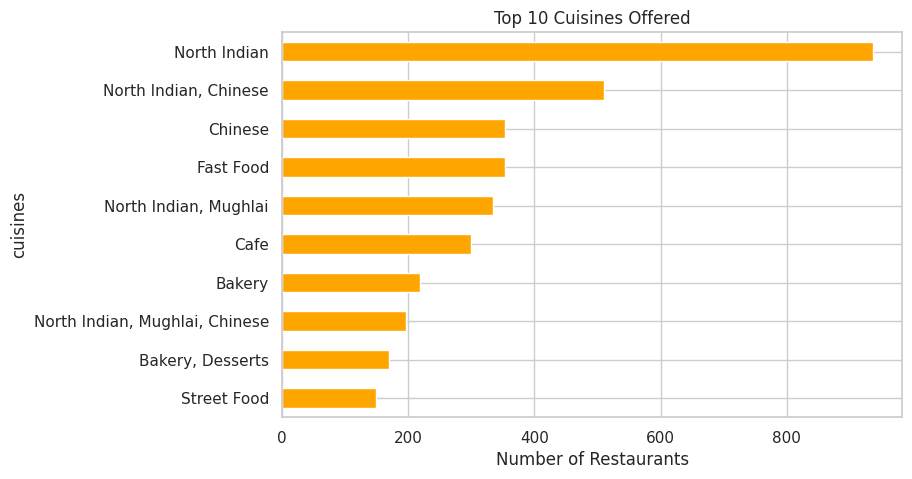

In [9]:
df['cuisines'].value_counts().head(10).plot(kind='barh', figsize=(8,5), color='orange')
plt.title('Top 10 Cuisines Offered')
plt.xlabel('Number of Restaurants')
plt.gca().invert_yaxis()
plt.show()

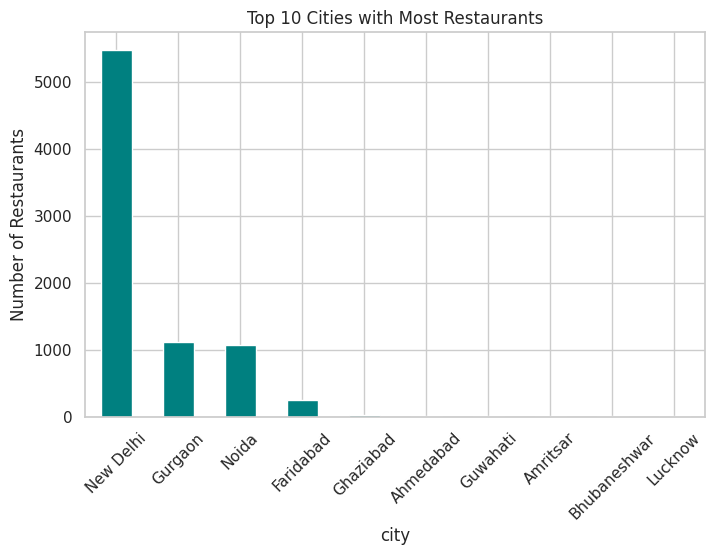

In [10]:
df['city'].value_counts().head(10).plot(kind='bar', figsize=(8,5), color='teal')
plt.title('Top 10 Cities with Most Restaurants')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


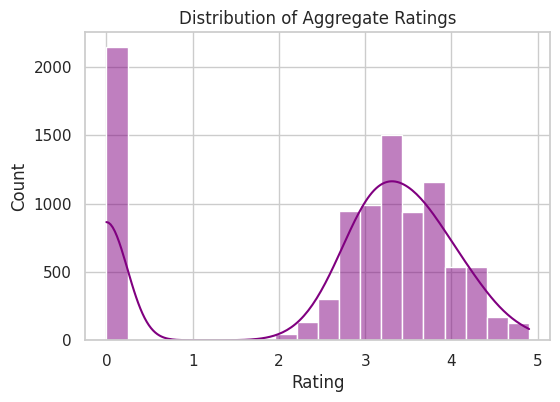

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(df['aggregate_rating'], bins=20, kde=True, color='purple')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Rating')
plt.show()

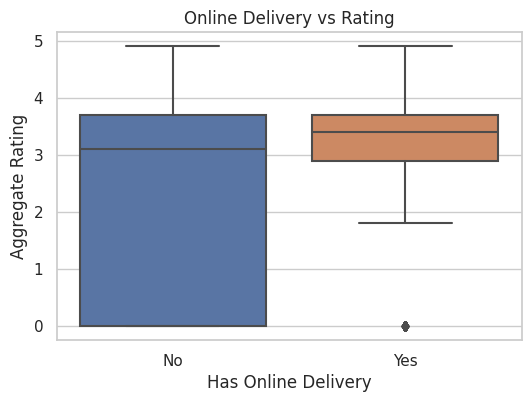

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x='has_online_delivery', y='aggregate_rating', data=df)
plt.title('Online Delivery vs Rating')
plt.xlabel('Has Online Delivery')
plt.ylabel('Aggregate Rating')
plt.show()

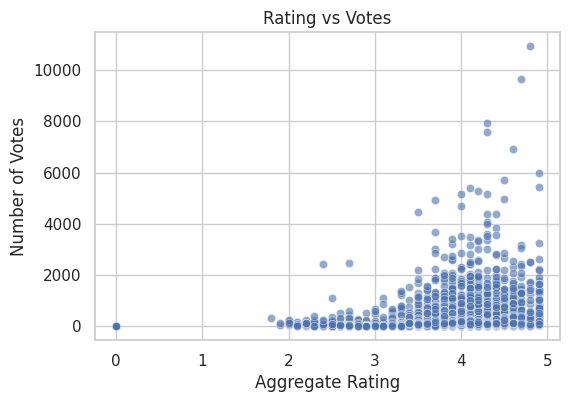

In [13]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='aggregate_rating', y='votes', data=df, alpha=0.6)
plt.title('Rating vs Votes')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Votes')
plt.show()

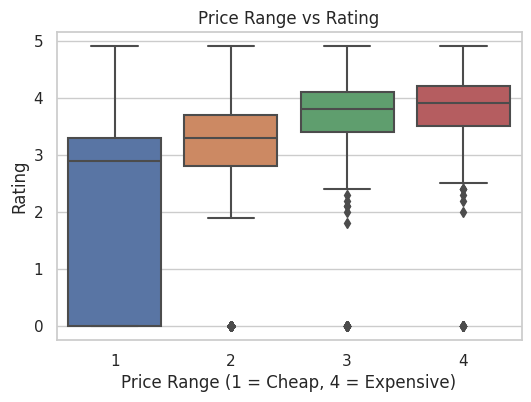

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='price_range', y='aggregate_rating', data=df)
plt.title('Price Range vs Rating')
plt.xlabel('Price Range (1 = Cheap, 4 = Expensive)')
plt.ylabel('Rating')
plt.show()

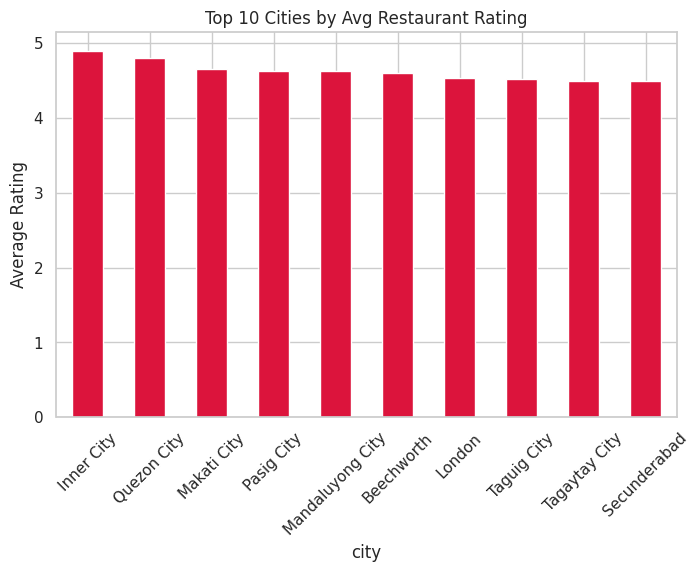

In [15]:
city_ratings = df.groupby('city')['aggregate_rating'].mean().sort_values(ascending=False).head(10)

city_ratings.plot(kind='bar', figsize=(8, 5), color='crimson')
plt.title('Top 10 Cities by Avg Restaurant Rating')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

In [16]:
top_restaurants = df[df['votes'] > 500].sort_values(by=['aggregate_rating', 'votes'], ascending=False).head(10)
top_restaurants[['restaurant_name', 'city', 'aggregate_rating', 'votes', 'cuisines']]

,restaurant_name,city,aggregate_rating,votes,cuisines
2414,Barbeque Nation,Kolkata,4.9,5966,"North Indian, Chinese"
2307,AB's - Absolute Barbecues,Hyderabad,4.9,5434,"European, Mediterranean, North Indian"
2495,Mirchi And Mime,Mumbai,4.9,3244,"North Indian, South Indian, Mughlai"
3013,Naturals Ice Cream,New Delhi,4.9,2620,Ice Cream
374,McGuire's Irish Pub & Brewery,Pensacola,4.9,2238,"Burger, Bar Food, Steak"
9296,Talaga Sampireun,Tangerang,4.9,2212,"Sunda, Indonesian"
3601,Indian Accent - The Manor,New Delhi,4.9,1934,Modern Indian
2409,Barbeque Nation,Kolkata,4.9,1753,"North Indian, Chinese"
9279,Talaga Sampireun,Jakarta,4.9,1662,"Sunda, Indonesian"
9291,Talaga Sampireun,Jakarta,4.9,1640,"Sunda, Indonesian"
